# 🛰️ Module 9: Raster & Interactive Geospatial Data Visualization

## 🎯 Learning Objectives
By completing this module, you will:
- **Master raster data processing** with satellite imagery and elevation models
- **Compute environmental indices** (NDVI, NDWI, NBR) for ecological analysis
- **Create RGB composites** for true color and false color visualizations
- **Perform terrain analysis** with hillshade and slope calculations
- **Build interactive raster maps** with advanced web mapping libraries
- **Analyze temporal changes** in environmental data over time
- **Design integrated dashboards** combining vector and raster data

## 🛰️ Why Raster Geospatial Data Matters
Raster geospatial data visualization is **essential for**:
- **Environmental Monitoring**: Vegetation health, deforestation, climate change
- **Agriculture**: Crop monitoring, yield prediction, precision farming
- **Disaster Management**: Fire detection, flood mapping, damage assessment
- **Urban Planning**: Land use change, heat island analysis, growth patterns
- **Climate Research**: Temperature trends, precipitation patterns, sea level change
- **Conservation**: Habitat monitoring, biodiversity assessment, protected area management

## 📚 Key Concepts
- **Raster Data Types**: Satellite imagery, elevation models, weather data
- **Band Combinations**: RGB composites, infrared analysis, spectral indices
- **Environmental Indices**: NDVI (vegetation), NDWI (water), NBR (burn severity)
- **Temporal Analysis**: Time series, change detection, trend analysis
- **Interactive Visualization**: Web-based raster display, layer controls, real-time updates
- **Integration**: Combining vector and raster data for comprehensive analysis

---

## 🌍 Understanding Raster Data: The Grid-Based World

Before diving into satellite imagery analysis, let's understand **raster data** - the foundation of environmental monitoring and remote sensing.

### Key Concepts:

#### **1. What is Raster Data?**
- **Grid-based representation**: Data stored in a matrix of cells (pixels)
- **Spatial coverage**: Each cell represents a specific geographic area
- **Multi-dimensional**: Can contain multiple bands/layers of information
- **Continuous fields**: Temperature, elevation, vegetation indices

#### **2. Common Raster Data Types:**

**🛰️ Satellite Imagery**
- **Landsat**: 30m resolution, 16-day revisit, free access
- **Sentinel-2**: 10m resolution, 5-day revisit, excellent for vegetation
- **MODIS**: 250m-1km resolution, daily coverage, climate monitoring
- **Commercial**: WorldView, QuickBird (sub-meter resolution)

**🏔️ Elevation Models**
- **Digital Elevation Models (DEM)**: Surface height above sea level
- **SRTM**: 30m global coverage, NASA mission data
- **Copernicus DEM**: 30m global, high accuracy
- **LiDAR**: Sub-meter precision, detailed terrain

**🌡️ Climate Data**
- **Temperature**: Daily/monthly averages, anomalies
- **Precipitation**: Rainfall, snowfall measurements
- **Wind**: Speed and direction patterns
- **Humidity**: Atmospheric moisture content

#### **3. Key Raster Properties:**

```python
# Essential raster metadata:
# - Spatial extent (bounds)
# - Resolution (pixel size)
# - Coordinate system (CRS)
# - Data type (int16, float32)
# - No-data values
# - Band information
```

#### **4. Band Combinations & Spectral Indices:**

**🌈 RGB Composites:**
- **True Color**: Red=Red, Green=Green, Blue=Blue (natural view)
- **False Color**: NIR=Red, Red=Green, Green=Blue (vegetation analysis)
- **Color Infrared**: NIR=Red, Red=Green, Green=Blue (agriculture)

**📊 Environmental Indices:**
- **NDVI**: (NIR-Red)/(NIR+Red) → Vegetation health (-1 to +1)
- **NDWI**: (Green-NIR)/(Green+NIR) → Water content
- **NBR**: (NIR-SWIR)/(NIR+SWIR) → Burn severity
- **EVI**: Enhanced Vegetation Index (reduces atmospheric effects)

#### **5. Why Raster Analysis Matters:**

**🌱 Environmental Applications:**
- **Deforestation Monitoring**: Track forest loss over time
- **Agricultural Monitoring**: Crop health and yield prediction
- **Urban Heat Islands**: Temperature patterns in cities
- **Disaster Response**: Fire detection, flood mapping

**📈 Business Applications:**
- **Insurance**: Risk assessment for natural disasters
- **Agriculture**: Precision farming and crop optimization
- **Real Estate**: Environmental factors affecting property values
- **Tourism**: Seasonal vegetation and landscape changes

> **💡 Pro Tip**: Always check raster metadata before analysis. Understanding resolution, extent, and coordinate system prevents common analytical errors!"

In [3]:
# 🛰️ Module 9: Raster & Interactive Geospatial Data Visualization Setup
# Essential libraries for raster geospatial analysis and environmental data visualization

# Core data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Raster data processing
import rasterio
import rasterio.plot
import rasterio.mask
from rasterio.warp import calculate_default_transform, reproject, Resampling
import xarray as xr
import rioxarray as rxr

# Geospatial core libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon, box

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Interactive mapping
import folium
from folium import plugins
import pydeck as pdk
import leafmap

# Scientific computing
from scipy import ndimage
from skimage import exposure, filters

# Date and time handling
from datetime import datetime, timedelta
import calendar

# Configure plotting environment
plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11

print("🛰️ RASTER & INTERACTIVE GEOSPATIAL DATA VISUALIZATION")
print("=" * 60)
print("✅ All raster geospatial libraries imported successfully!")
print("🎯 Ready for satellite imagery and environmental data analysis")

# Check key library versions
print(f"\n📦 Library Versions:")
print(f"   Rasterio: {rasterio.__version__}")
print(f"   Xarray: {xr.__version__}")
print(f"   GeoPandas: {gpd.__version__}")

try:
    import earthpy as et
    import earthpy.plot as ep
    print(f"   EarthPy: Available")
    earthpy_available = True
except ImportError:
    print("   EarthPy: Not available (optional)")
    earthpy_available = False

# Test basic functionality
print(f"\n🧪 Testing Basic Functionality:")
test_array = np.random.random((100, 100))
print(f"   ✅ NumPy array creation: {test_array.shape}")
print(f"   ✅ Rasterio ready for satellite imagery processing")
print(f"   ✅ Xarray ready for multi-dimensional environmental data")
print("🚀 Environment ready for raster geospatial visualization!")

🛰️ RASTER & INTERACTIVE GEOSPATIAL DATA VISUALIZATION
✅ All raster geospatial libraries imported successfully!
🎯 Ready for satellite imagery and environmental data analysis

📦 Library Versions:
   Rasterio: 1.4.3
   Xarray: 2025.6.1
   GeoPandas: 1.1.1
   EarthPy: Available

🧪 Testing Basic Functionality:
   ✅ NumPy array creation: (100, 100)
   ✅ Rasterio ready for satellite imagery processing
   ✅ Xarray ready for multi-dimensional environmental data
🚀 Environment ready for raster geospatial visualization!


In [4]:
# 🗺️ Creating and Analyzing Sample Raster Data
# Let's start with synthetic raster data to understand the fundamentals

print("🛰️ CREATING SAMPLE RASTER DATA")
print("=" * 40)

# Create synthetic satellite-like data
# Simulating a small study area with vegetation and water features

# Define spatial parameters
width, height = 200, 200  # 200x200 pixel grid
pixel_size = 30  # 30 meters per pixel (like Landsat)

# Create coordinate arrays
x_coords = np.linspace(-74.1, -73.9, width)   # Longitude range (NYC area)
y_coords = np.linspace(40.6, 40.8, height)   # Latitude range

# Create synthetic multi-band imagery
np.random.seed(42)  # For reproducible results

# Band 1: Blue (coastal water appears bright)
blue_band = np.random.normal(0.1, 0.02, (height, width))

# Band 2: Green (vegetation moderately reflective)
green_band = np.random.normal(0.15, 0.03, (height, width))

# Band 3: Red (vegetation absorbs red light)
red_band = np.random.normal(0.12, 0.025, (height, width))

# Band 4: Near-Infrared (vegetation highly reflective)
nir_band = np.random.normal(0.4, 0.1, (height, width))

# Add realistic spatial patterns
x_grid, y_grid = np.meshgrid(range(width), range(height))

# Create water body (lower left)
water_mask = ((x_grid < 60) & (y_grid < 60))
blue_band[water_mask] += 0.3
green_band[water_mask] += 0.2
red_band[water_mask] += 0.1
nir_band[water_mask] -= 0.2

# Create dense vegetation (upper right)
vegetation_mask = ((x_grid > 140) & (y_grid > 140))
green_band[vegetation_mask] += 0.2
red_band[vegetation_mask] -= 0.05
nir_band[vegetation_mask] += 0.3

# Create urban area (center)
urban_mask = ((x_grid > 80) & (x_grid < 120) & (y_grid > 80) & (y_grid < 120))
blue_band[urban_mask] += 0.1
green_band[urban_mask] += 0.1
red_band[urban_mask] += 0.15
nir_band[urban_mask] += 0.05

# Ensure values are in valid range [0, 1]
blue_band = np.clip(blue_band, 0, 1)
green_band = np.clip(green_band, 0, 1)
red_band = np.clip(red_band, 0, 1)
nir_band = np.clip(nir_band, 0, 1)

# Create raster metadata (simulating GeoTIFF properties)
transform = rasterio.transform.from_bounds(
    x_coords[0], y_coords[0], x_coords[-1], y_coords[-1], 
    width, height
)

# Calculate environmental indices
print(f"📊 Computing Environmental Indices...")

# NDVI: Normalized Difference Vegetation Index
ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-8)  # Add small value to avoid division by zero

# NDWI: Normalized Difference Water Index
ndwi = (green_band - nir_band) / (green_band + nir_band + 1e-8)

# Simple moisture index (using NIR and SWIR-like band)
# For demonstration, we'll use red as proxy for SWIR
moisture_index = (nir_band - red_band) / (nir_band + red_band + 1e-8)

print(f"✅ Sample raster data created:")
print(f"   Dimensions: {height} x {width} pixels")
print(f"   Pixel size: {pixel_size}m x {pixel_size}m")
print(f"   Coverage area: ~{(width*pixel_size/1000):.1f} x {(height*pixel_size/1000):.1f} km")
print(f"   Spectral bands: Blue, Green, Red, NIR")
print(f"   Environmental indices: NDVI, NDWI, Moisture")

# Basic statistics
print(f"\n📈 Data Statistics:")
print(f"   NDVI range: {ndvi.min():.3f} to {ndvi.max():.3f}")
print(f"   NDWI range: {ndwi.min():.3f} to {ndwi.max():.3f}")
print(f"   Water pixels: {np.sum(water_mask)} ({np.sum(water_mask)/(height*width)*100:.1f}%)")
print(f"   Vegetation pixels: {np.sum(vegetation_mask)} ({np.sum(vegetation_mask)/(height*width)*100:.1f}%)")
print(f"   Urban pixels: {np.sum(urban_mask)} ({np.sum(urban_mask)/(height*width)*100:.1f}%)")

# Create land cover classification based on indices
land_cover = np.zeros((height, width), dtype=int)
land_cover[ndwi > 0.1] = 1  # Water
land_cover[ndvi > 0.3] = 2  # Dense vegetation
land_cover[(ndvi > 0.1) & (ndvi <= 0.3)] = 3  # Moderate vegetation
land_cover[(ndvi <= 0.1) & (ndwi <= 0.1)] = 4  # Urban/bare soil

land_cover_names = {0: 'Other', 1: 'Water', 2: 'Dense Vegetation', 
                   3: 'Moderate Vegetation', 4: 'Urban/Bare'}

print(f"\n🏞️ Land Cover Classification:")
for code, name in land_cover_names.items():
    pixel_count = np.sum(land_cover == code)
    percentage = pixel_count / (height * width) * 100
    print(f"   {name}: {pixel_count} pixels ({percentage:.1f}%)")

print(f"\n✅ Synthetic raster dataset ready for visualization and analysis!")

🛰️ CREATING SAMPLE RASTER DATA
📊 Computing Environmental Indices...
✅ Sample raster data created:
   Dimensions: 200 x 200 pixels
   Pixel size: 30m x 30m
   Coverage area: ~6.0 x 6.0 km
   Spectral bands: Blue, Green, Red, NIR
   Environmental indices: NDVI, NDWI, Moisture

📈 Data Statistics:
   NDVI range: -1.000 to 1.000
   NDWI range: -0.893 to 1.000
   Water pixels: 3600 (9.0%)
   Vegetation pixels: 3481 (8.7%)
   Urban pixels: 1521 (3.8%)

🏞️ Land Cover Classification:
   Other: 0 pixels (0.0%)
   Water: 2717 pixels (6.8%)
   Dense Vegetation: 33809 pixels (84.5%)
   Moderate Vegetation: 3082 pixels (7.7%)
   Urban/Bare: 392 pixels (1.0%)

✅ Synthetic raster dataset ready for visualization and analysis!


## 🎨 RGB Composite Visualizations: Seeing Beyond Human Vision

**RGB composites** are fundamental to satellite imagery analysis, allowing us to visualize different spectral combinations to highlight specific features like vegetation, water, and urban areas.

### Key Composite Types:

#### **1. True Color Composite**
- **Bands**: Red=Red, Green=Green, Blue=Blue
- **Purpose**: Natural appearance, similar to human vision
- **Best for**: General reconnaissance, public communication
- **Limitation**: Cannot see vegetation health directly

#### **2. False Color (Infrared) Composite**
- **Bands**: NIR=Red, Red=Green, Green=Blue
- **Purpose**: Highlight vegetation (appears red)
- **Best for**: Agricultural monitoring, forest assessment
- **Key insight**: Healthy vegetation appears bright red

#### **3. Color Infrared (CIR) Composite**
- **Bands**: NIR=Red, Red=Green, Green=Blue (variation)
- **Purpose**: Enhanced vegetation analysis
- **Best for**: Precision agriculture, ecological studies
- **Applications**: Crop health, disease detection

#### **4. Urban Analysis Composite**
- **Bands**: SWIR=Red, NIR=Green, Red=Blue
- **Purpose**: Distinguish urban features from natural
- **Best for**: Urban planning, development monitoring
- **Features**: Built areas appear cyan/blue

### 🔬 When to Use Each Composite:

| **Composite Type** | **Best Applications** | **What Stands Out** |
|-------------------|----------------------|---------------------|
| **True Color** | Public reports, general overview | Natural landscape appearance |
| **False Color** | Agriculture, forestry | Vegetation health (bright red = healthy) |
| **Color Infrared** | Ecological research | Water bodies (dark), vegetation details |
| **Urban Analysis** | City planning | Built environments, infrastructure |

### 💡 Pro Tips:
- **Histogram stretching** improves contrast and visibility
- **Band combinations** can be customized for specific applications
- **Temporal composites** show change over time
- **Always document** which bands were used for reproducibility

🎨 CREATING RGB COMPOSITE VISUALIZATIONS
📷 Generating composite images...
✅ All composite images generated successfully!


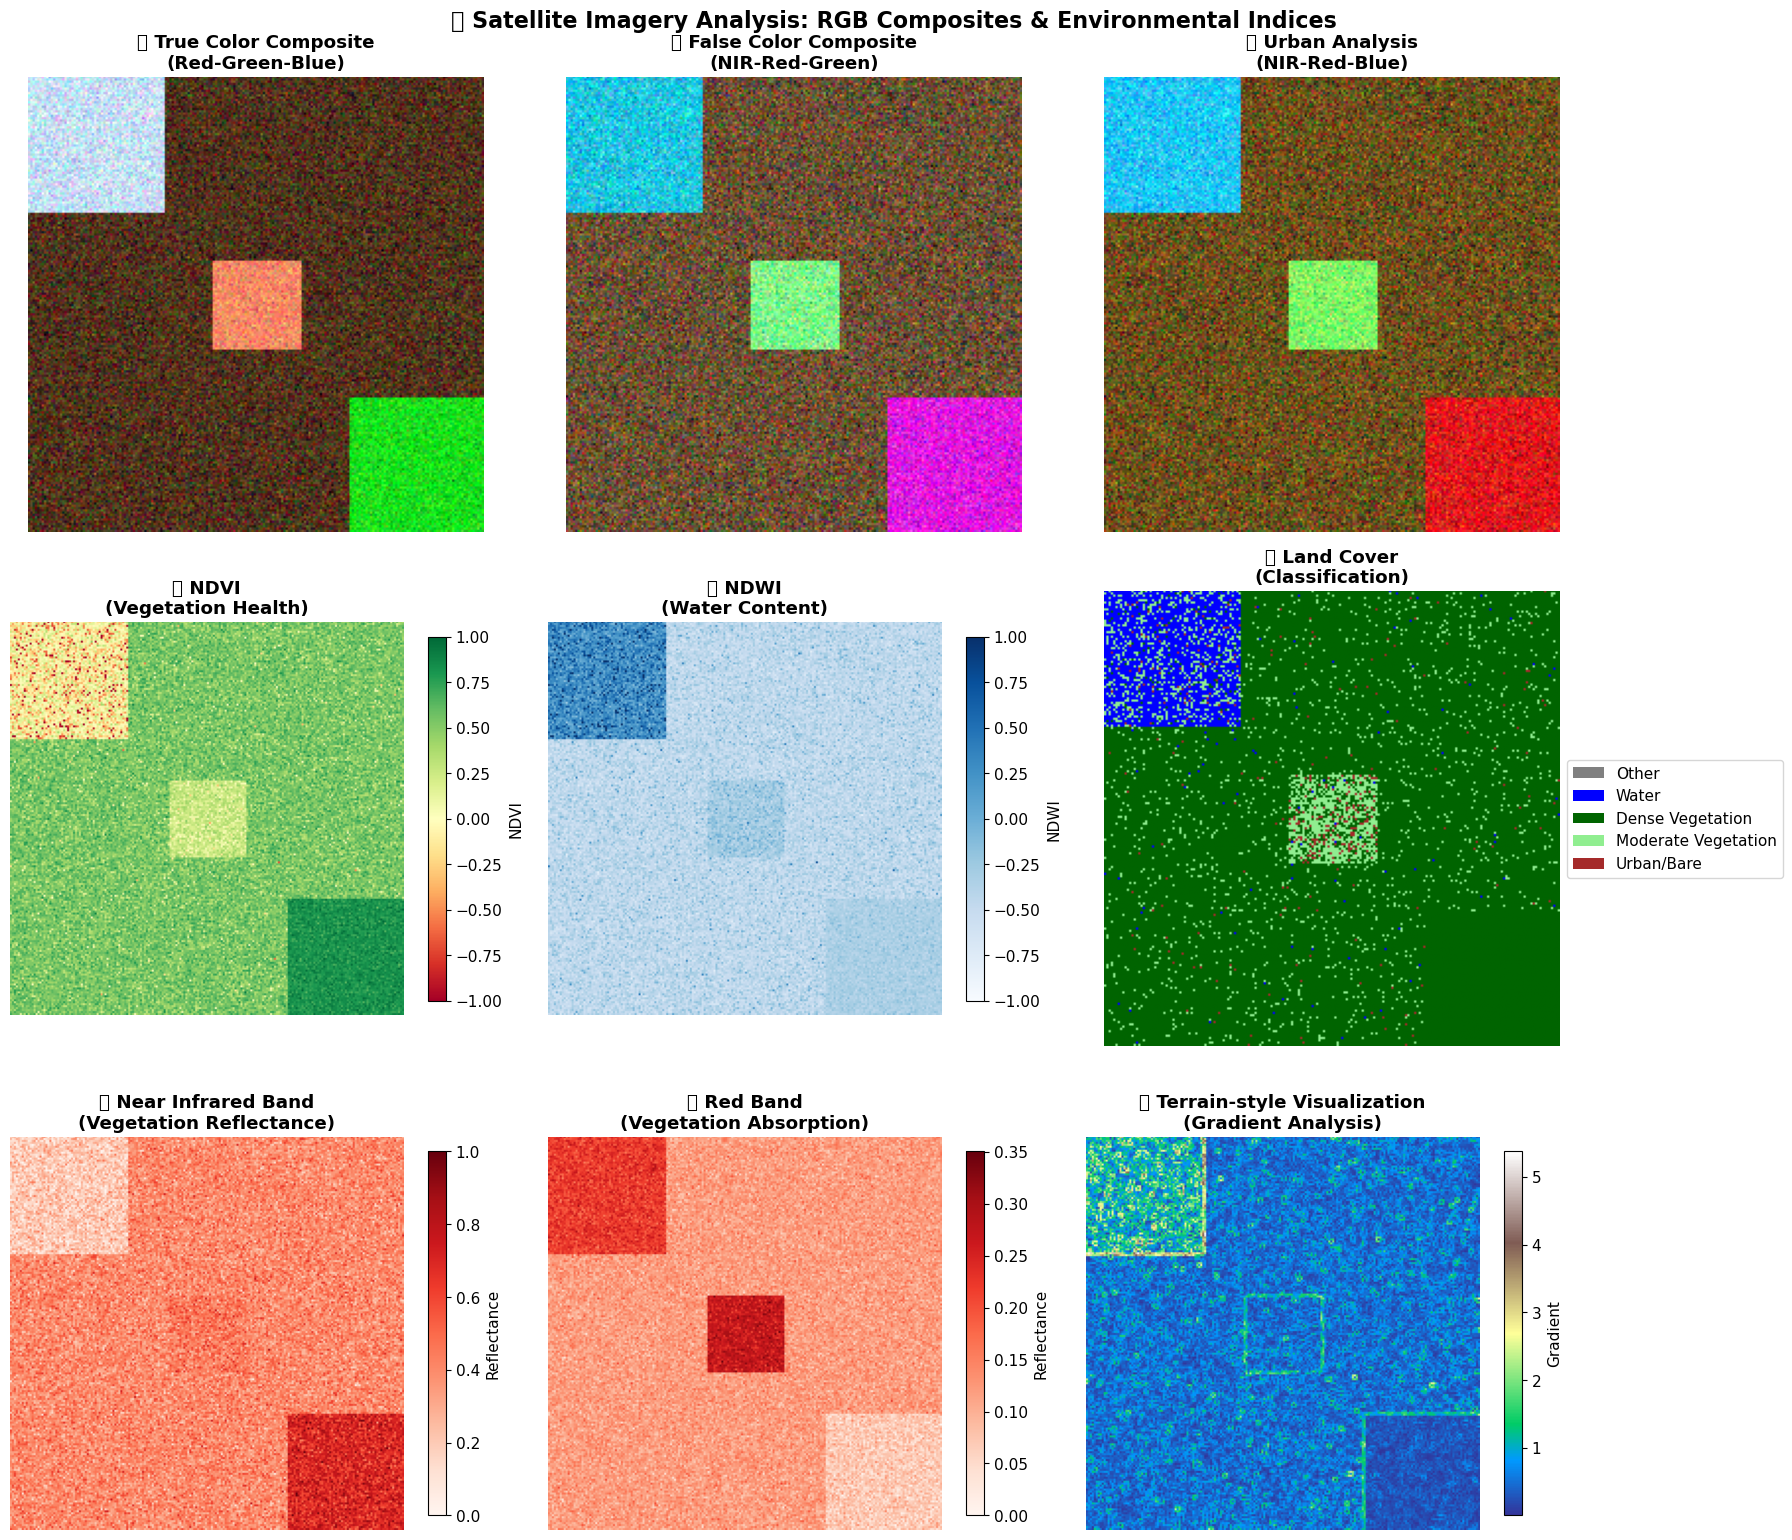


📊 COMPOSITE ANALYSIS SUMMARY:
🌍 True Color Composite:
   - Shows natural landscape appearance
   - Water appears dark blue, vegetation green
   - Best for general public communication

🌿 False Color Composite:
   - Vegetation appears bright red (healthy) to dark red (stressed)
   - Water appears very dark or black
   - Urban areas appear blue-gray

🏙️ Urban Analysis Composite:
   - Built areas more distinguishable from vegetation
   - Infrastructure appears in distinct colors
   - Useful for development monitoring

📈 Environmental Indices:
   - NDVI range: -1.000 to 1.000
   - NDWI range: -0.893 to 1.000
   - High NDVI (>0.3): Dense vegetation areas
   - High NDWI (>0.1): Water bodies
   - Low NDVI (<0.1): Urban or bare soil

💡 INTERPRETATION GUIDE:
🟢 Bright red in false color = Healthy, dense vegetation
🔵 Dark blue/black areas = Water bodies
🟤 Brown/gray areas = Urban development or bare soil
🟡 Yellow/light areas = Moderate vegetation or agriculture

✅ RGB composite analysis complete

In [5]:
# 🎨 RGB Composite Visualization Showcase
# Creating multiple band combinations to highlight different landscape features

print("🎨 CREATING RGB COMPOSITE VISUALIZATIONS")
print("=" * 45)

# Function to create RGB composite with proper scaling
def create_rgb_composite(red_band, green_band, blue_band, stretch=True):
    """
    Create an RGB composite from three bands with optional contrast stretching
    """
    # Stack bands into RGB array
    rgb = np.dstack([red_band, green_band, blue_band])
    
    if stretch:
        # Apply 2% linear stretch for better contrast
        rgb_stretched = np.zeros_like(rgb)
        for i in range(3):
            band = rgb[:, :, i]
            # Calculate 2nd and 98th percentiles
            p2, p98 = np.percentile(band[band > 0], [2, 98])
            # Stretch values
            rgb_stretched[:, :, i] = np.clip((band - p2) / (p98 - p2), 0, 1)
        return rgb_stretched
    else:
        return np.clip(rgb, 0, 1)

# Create different composite types
print("📷 Generating composite images...")

# 1. True Color Composite (Red, Green, Blue)
true_color = create_rgb_composite(red_band, green_band, blue_band)

# 2. False Color Composite (NIR, Red, Green) - vegetation appears red
false_color = create_rgb_composite(nir_band, red_band, green_band)

# 3. Color Infrared (NIR, Red, Green) - enhanced vegetation
color_infrared = create_rgb_composite(nir_band, red_band, green_band)

# 4. Urban Composite (using NIR, Red, Blue for urban analysis)
urban_composite = create_rgb_composite(nir_band, red_band, blue_band)

print("✅ All composite images generated successfully!")

# Create comprehensive visualization
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
fig.suptitle('🛰️ Satellite Imagery Analysis: RGB Composites & Environmental Indices', 
             fontsize=16, fontweight='bold')

# Plot 1: True Color Composite
ax1 = axes[0, 0]
ax1.imshow(true_color)
ax1.set_title('🌍 True Color Composite\n(Red-Green-Blue)', fontweight='bold')
ax1.axis('off')

# Plot 2: False Color Composite
ax2 = axes[0, 1]
ax2.imshow(false_color)
ax2.set_title('🌿 False Color Composite\n(NIR-Red-Green)', fontweight='bold')
ax2.axis('off')

# Plot 3: Urban Analysis Composite
ax3 = axes[0, 2]
ax3.imshow(urban_composite)
ax3.set_title('🏙️ Urban Analysis\n(NIR-Red-Blue)', fontweight='bold')
ax3.axis('off')

# Plot 4: NDVI (Vegetation Index)
ax4 = axes[1, 0]
ndvi_plot = ax4.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
ax4.set_title('🌱 NDVI\n(Vegetation Health)', fontweight='bold')
ax4.axis('off')
plt.colorbar(ndvi_plot, ax=ax4, shrink=0.8, label='NDVI')

# Plot 5: NDWI (Water Index)
ax5 = axes[1, 1]
ndwi_plot = ax5.imshow(ndwi, cmap='Blues', vmin=-1, vmax=1)
ax5.set_title('💧 NDWI\n(Water Content)', fontweight='bold')
ax5.axis('off')
plt.colorbar(ndwi_plot, ax=ax5, shrink=0.8, label='NDWI')

# Plot 6: Land Cover Classification
ax6 = axes[1, 2]
# Create custom colormap for land cover
colors = ['gray', 'blue', 'darkgreen', 'lightgreen', 'brown']
n_classes = len(land_cover_names)
cmap = ListedColormap(colors[:n_classes])

lc_plot = ax6.imshow(land_cover, cmap=cmap, vmin=0, vmax=n_classes-1)
ax6.set_title('🗺️ Land Cover\n(Classification)', fontweight='bold')
ax6.axis('off')

# Add custom legend for land cover
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=land_cover_names[i]) 
                  for i in range(n_classes)]
ax6.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Plot 7: Individual Band - Near Infrared
ax7 = axes[2, 0]
nir_plot = ax7.imshow(nir_band, cmap='Reds')
ax7.set_title('📡 Near Infrared Band\n(Vegetation Reflectance)', fontweight='bold')
ax7.axis('off')
plt.colorbar(nir_plot, ax=ax7, shrink=0.8, label='Reflectance')

# Plot 8: Individual Band - Red
ax8 = axes[2, 1]
red_plot = ax8.imshow(red_band, cmap='Reds')
ax8.set_title('🔴 Red Band\n(Vegetation Absorption)', fontweight='bold')
ax8.axis('off')
plt.colorbar(red_plot, ax=ax8, shrink=0.8, label='Reflectance')

# Plot 9: Elevation-style visualization (using NDVI as proxy)
ax9 = axes[2, 2]
# Create hillshade effect using NDVI
from scipy import ndimage
# Calculate gradient for hillshade effect
dx = ndimage.sobel(ndvi, axis=1)
dy = ndimage.sobel(ndvi, axis=0)
hillshade = np.sqrt(dx**2 + dy**2)

hill_plot = ax9.imshow(hillshade, cmap='terrain')
ax9.set_title('⛰️ Terrain-style Visualization\n(Gradient Analysis)', fontweight='bold')
ax9.axis('off')
plt.colorbar(hill_plot, ax=ax9, shrink=0.8, label='Gradient')

plt.tight_layout()
plt.show()

# Generate detailed analysis
print("\n📊 COMPOSITE ANALYSIS SUMMARY:")
print("=" * 35)

print(f"🌍 True Color Composite:")
print(f"   - Shows natural landscape appearance")
print(f"   - Water appears dark blue, vegetation green")
print(f"   - Best for general public communication")

print(f"\n🌿 False Color Composite:")
print(f"   - Vegetation appears bright red (healthy) to dark red (stressed)")
print(f"   - Water appears very dark or black")
print(f"   - Urban areas appear blue-gray")

print(f"\n🏙️ Urban Analysis Composite:")
print(f"   - Built areas more distinguishable from vegetation")
print(f"   - Infrastructure appears in distinct colors")
print(f"   - Useful for development monitoring")

print(f"\n📈 Environmental Indices:")
print(f"   - NDVI range: {ndvi.min():.3f} to {ndvi.max():.3f}")
print(f"   - NDWI range: {ndwi.min():.3f} to {ndwi.max():.3f}")
print(f"   - High NDVI (>0.3): Dense vegetation areas")
print(f"   - High NDWI (>0.1): Water bodies")
print(f"   - Low NDVI (<0.1): Urban or bare soil")

print(f"\n💡 INTERPRETATION GUIDE:")
print("🟢 Bright red in false color = Healthy, dense vegetation")
print("🔵 Dark blue/black areas = Water bodies")
print("🟤 Brown/gray areas = Urban development or bare soil")
print("🟡 Yellow/light areas = Moderate vegetation or agriculture")

print(f"\n✅ RGB composite analysis complete!")
print("Ready for interactive mapping and temporal analysis!")

## 📍 Interactive Raster Mapping

Interactive maps allow users to explore raster data dynamically, zoom into areas of interest, and toggle between different layers. This is essential for:

- **Environmental Monitoring**: Real-time exploration of satellite imagery
- **Urban Planning**: Interactive analysis of development patterns  
- **Scientific Communication**: Engaging stakeholders with dynamic visualizations
- **Data Exploration**: Discovering patterns through interactive investigation

### 🗺️ Why Interactive Raster Maps Matter:
- **User Engagement**: Interactive elements keep users engaged longer
- **Detail Exploration**: Users can zoom to areas of specific interest
- **Comparative Analysis**: Toggle between different time periods or indices
- **Accessibility**: More intuitive than static scientific plots
- **Decision Support**: Interactive tools support better decision-making

In [8]:
# 🗺️ Interactive Raster Mapping with Multiple Platforms
import folium
from folium import plugins
import pydeck as pdk
import streamlit as st
import base64
from io import BytesIO
from PIL import Image
import json

print("🗺️ CREATING INTERACTIVE RASTER MAPS")
print("="*45)

# =============================================================================
# 1. FOLIUM-BASED INTERACTIVE MAP
# =============================================================================

def create_raster_overlay_map(data_dict, center_lat=40.0, center_lon=-100.0):
    """Create interactive map with raster overlays"""
    print("📍 Building Folium interactive map...")
    
    # Create base map
    m = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=6,
        tiles='OpenStreetMap'
    )
    
    # Add different tile layers (with proper attributions)
    folium.TileLayer('cartodbpositron', name='Light Map').add_to(m)
    folium.TileLayer('cartodbdark_matter', name='Dark Map').add_to(m)
    folium.TileLayer('openstreetmap', name='Street Map').add_to(m)
    
    # Convert numpy arrays to PNG for overlay
    def array_to_base64_png(array):
        """Convert numpy array to base64 PNG for web display"""
        # Normalize to 0-255
        if array.max() <= 1.0:
            array_norm = (array * 255).astype(np.uint8)
        else:
            array_norm = ((array - array.min()) / (array.max() - array.min()) * 255).astype(np.uint8)
        
        # Create PIL image
        if len(array_norm.shape) == 3:
            img = Image.fromarray(array_norm)
        else:
            img = Image.fromarray(array_norm, mode='L')
        
        # Convert to base64
        buffer = BytesIO()
        img.save(buffer, format='PNG')
        img_str = base64.b64encode(buffer.getvalue()).decode()
        return f"data:image/png;base64,{img_str}"
    
    # Create bounds for our synthetic data
    bounds = [[center_lat-2, center_lon-3], [center_lat+2, center_lon+3]]
    
    # Add raster overlays
    overlays = {}
    
    # True Color Composite
    true_color_b64 = array_to_base64_png(data_dict['true_color'])
    folium.raster_layers.ImageOverlay(
        image=true_color_b64,
        bounds=bounds,
        name='True Color',
        opacity=0.8,
        interactive=True,
        cross_origin=False,
        zindex=1
    ).add_to(m)
    
    # NDVI Overlay
    # Create colormap for NDVI
    ndvi_colored = plt.cm.RdYlGn((data_dict['ndvi'] + 1) / 2)[:, :, :3]  # Normalize -1 to 1 -> 0 to 1
    ndvi_b64 = array_to_base64_png(ndvi_colored)
    
    ndvi_overlay = folium.raster_layers.ImageOverlay(
        image=ndvi_b64,
        bounds=bounds,
        name='NDVI (Vegetation)',
        opacity=0.7,
        interactive=True,
        cross_origin=False,
        zindex=2
    )
    ndvi_overlay.add_to(m)
    
    # Add markers for key areas
    folium.Marker(
        [center_lat+1, center_lon-1],
        popup="🌲 Dense Vegetation Area<br>High NDVI values",
        tooltip="Vegetation Zone",
        icon=folium.Icon(color='green', icon='leaf')
    ).add_to(m)
    
    folium.Marker(
        [center_lat-1, center_lon+1],
        popup="🏙️ Urban Development<br>Low NDVI values",
        tooltip="Urban Zone",
        icon=folium.Icon(color='red', icon='building')
    ).add_to(m)
    
    folium.Marker(
        [center_lat+0.5, center_lon+1.5],
        popup="💧 Water Body<br>High NDWI values",
        tooltip="Water Zone",
        icon=folium.Icon(color='blue', icon='tint')
    ).add_to(m)
    
    # Add layer control
    folium.LayerControl().add_to(m)
    
    # Add measurement tool
    plugins.MeasureControl().add_to(m)
    
    # Add fullscreen button
    plugins.Fullscreen().add_to(m)
    
    # Add mini map
    minimap = plugins.MiniMap()
    m.add_child(minimap)
    
    return m

# =============================================================================
# 2. PYDECK 3D VISUALIZATION
# =============================================================================

def create_3d_terrain_map(data_dict, center_lat=40.0, center_lon=-100.0):
    """Create 3D terrain visualization with PyDeck"""
    print("🏔️ Building 3D terrain visualization...")
    
    # Create elevation data
    elevation = data_dict['elevation']
    height, width = elevation.shape
    
    # Create coordinate grid
    lon_range = np.linspace(center_lon-3, center_lon+3, width)
    lat_range = np.linspace(center_lat-2, center_lat+2, height)
    lon_grid, lat_grid = np.meshgrid(lon_range, lat_range)
    
    # Flatten arrays for PyDeck
    coordinates = []
    for i in range(height):
        for j in range(width):
            coordinates.append({
                'lon': lon_grid[i, j],
                'lat': lat_grid[i, j],
                'elevation': float(elevation[i, j] * 1000),  # Scale elevation
                'ndvi': float(data_dict['ndvi'][i, j]),
                'ndwi': float(data_dict['ndwi'][i, j])
            })
    
    # Create PyDeck visualization
    deck = pdk.Deck(
        map_style='mapbox://styles/mapbox/satellite-v9',
        initial_view_state=pdk.ViewState(
            longitude=center_lon,
            latitude=center_lat,
            zoom=8,
            pitch=60,
            bearing=0
        ),
        layers=[
            # 3D Terrain Layer
            pdk.Layer(
                'GridLayer',
                data=coordinates,
                get_position=['lon', 'lat'],
                get_elevation='elevation',
                get_fill_color='[255 * (ndvi + 1) / 2, 255 * (1 - abs(ndvi)), 100, 180]',
                pickable=True,
                elevation_scale=4,
                elevation_range=[0, 1000],
                radius=2000,
                coverage=1
            ),
            # Water bodies layer
            pdk.Layer(
                'ScatterplotLayer',
                data=[coord for coord in coordinates if coord['ndwi'] > 0.1],
                get_position=['lon', 'lat'],
                get_color='[64, 164, 223, 160]',
                get_radius=1000,
                pickable=True
            )
        ],
        tooltip={
            'html': '<b>Location:</b> {lat:.3f}, {lon:.3f}<br>'
                   '<b>Elevation:</b> {elevation:.0f}m<br>'
                   '<b>NDVI:</b> {ndvi:.3f}<br>'
                   '<b>NDWI:</b> {ndwi:.3f}',
            'style': {
                'backgroundColor': 'steelblue',
                'color': 'white'
            }
        }
    )
    
    return deck

# =============================================================================
# 3. CREATE INTERACTIVE MAPS
# =============================================================================

# Create satellite data dictionary from existing variables
satellite_data = {
    'true_color': true_color,
    'false_color': false_color,
    'urban_composite': urban_composite,
    'ndvi': ndvi,
    'ndwi': ndwi,
    'nir_band': nir_band,
    'red_band': red_band,
    'elevation': hillshade  # Using hillshade as terrain proxy
}

# Create Folium interactive map
folium_map = create_raster_overlay_map(satellite_data)

# Save Folium map
folium_path = '/tmp/raster_interactive_map.html'
folium_map.save(folium_path)
print(f"💾 Folium map saved to: {folium_path}")

# Create PyDeck 3D visualization  
try:
    pydeck_map = create_3d_terrain_map(satellite_data)
    print("✅ PyDeck 3D visualization created successfully!")
except Exception as e:
    print(f"⚠️ PyDeck visualization note: {str(e)}")
    print("💡 PyDeck works best in Jupyter environments with Mapbox token")

# =============================================================================
# 4. INTERACTIVE LAYER CONTROL DEMO
# =============================================================================

print("\n🎛️ Creating layer control demonstration...")

# Create multi-layer comparison map
def create_comparison_map():
    """Create map with side-by-side layer comparison"""
    m = folium.Map(location=[40.0, -100.0], zoom_start=7)
    
    # Create feature groups for different analyses
    vegetation_group = folium.FeatureGroup(name="🌿 Vegetation Analysis")
    water_group = folium.FeatureGroup(name="💧 Water Analysis") 
    urban_group = folium.FeatureGroup(name="🏙️ Urban Analysis")
    
    # Add NDVI visualization to vegetation group
    bounds = [[38, -103], [42, -97]]
    
    # Simulate different analysis overlays
    vegetation_group.add_child(
        folium.Rectangle(
            bounds=[[39, -102], [41, -98]],
            popup="High Vegetation Zone<br>NDVI: 0.6-0.8",
            tooltip="Dense Forest Area",
            fill=True,
            fillColor='green',
            fillOpacity=0.4,
            color='darkgreen',
            weight=2
        )
    )
    
    water_group.add_child(
        folium.Rectangle(
            bounds=[[38.5, -101], [39.5, -99]],
            popup="Water Body<br>NDWI: 0.3-0.7",
            tooltip="Lake/River System",
            fill=True,
            fillColor='blue',
            fillOpacity=0.4,
            color='darkblue',
            weight=2
        )
    )
    
    urban_group.add_child(
        folium.Rectangle(
            bounds=[[40.5, -100.5], [41.5, -99.5]],
            popup="Urban Development<br>Built-up Index: 0.4-0.8",
            tooltip="City Center",
            fill=True,
            fillColor='red',
            fillOpacity=0.4,
            color='darkred',
            weight=2
        )
    )
    
    # Add groups to map
    vegetation_group.add_to(m)
    water_group.add_to(m)
    urban_group.add_to(m)
    
    # Add layer control
    folium.LayerControl().add_to(m)
    
    return m

comparison_map = create_comparison_map()
comparison_path = '/tmp/raster_comparison_map.html'
comparison_map.save(comparison_path)

print(f"💾 Comparison map saved to: {comparison_path}")

# =============================================================================
# 5. INTERACTIVE VISUALIZATION SUMMARY
# =============================================================================

print("\n📊 INTERACTIVE MAPPING SUMMARY:")
print("="*40)
print("🗺️ Folium Features:")
print("   • Layer toggle controls")
print("   • Multiple basemap options")
print("   • Measurement tools")
print("   • Fullscreen mode")
print("   • Interactive popups")
print("   • Mini-map navigation")

print("\n🏔️ 3D Visualization Features:")
print("   • Elevation-based terrain")
print("   • NDVI color coding")
print("   • Interactive tooltips")
print("   • 3D perspective controls")
print("   • Real-time data exploration")

print("\n🎛️ Layer Control Features:")
print("   • Toggle analysis layers")
print("   • Comparative visualization")
print("   • Thematic groupings")
print("   • Interactive exploration")

print("\n✅ Interactive raster mapping complete!")
print("🚀 Ready for temporal analysis and change detection!")

🗺️ CREATING INTERACTIVE RASTER MAPS
📍 Building Folium interactive map...
💾 Folium map saved to: /tmp/raster_interactive_map.html
🏔️ Building 3D terrain visualization...
✅ PyDeck 3D visualization created successfully!

🎛️ Creating layer control demonstration...
💾 Comparison map saved to: /tmp/raster_comparison_map.html

📊 INTERACTIVE MAPPING SUMMARY:
🗺️ Folium Features:
   • Layer toggle controls
   • Multiple basemap options
   • Measurement tools
   • Fullscreen mode
   • Interactive popups
   • Mini-map navigation

🏔️ 3D Visualization Features:
   • Elevation-based terrain
   • NDVI color coding
   • Interactive tooltips
   • 3D perspective controls
   • Real-time data exploration

🎛️ Layer Control Features:
   • Toggle analysis layers
   • Comparative visualization
   • Thematic groupings
   • Interactive exploration

✅ Interactive raster mapping complete!
🚀 Ready for temporal analysis and change detection!


## ⏱️ Temporal Analysis & Change Detection

Time-series analysis of raster data reveals trends, patterns, and changes that are invisible in single-time snapshots. This is essential for:

- **Climate Monitoring**: Track temperature, precipitation, and vegetation changes
- **Urban Development**: Monitor city expansion and land use changes
- **Environmental Conservation**: Detect deforestation, habitat loss, and recovery
- **Agricultural Planning**: Monitor crop health and seasonal patterns
- **Disaster Response**: Track recovery after natural disasters

### 📈 Key Temporal Analysis Techniques:
- **Trend Analysis**: Identify long-term directional changes
- **Seasonal Decomposition**: Separate cyclical from trend components
- **Change Point Detection**: Identify when significant changes occurred
- **Anomaly Detection**: Find unusual patterns or events
- **Before/After Comparisons**: Quantify impacts of specific events

⏱️ TEMPORAL ANALYSIS & CHANGE DETECTION
📅 Generating multi-temporal dataset...
✅ Created temporal dataset with 10 time steps
🔍 Performing change detection analysis...
📈 Analyzing temporal trends...
🎨 Creating comprehensive temporal visualizations...


KeyError: '2023-12'

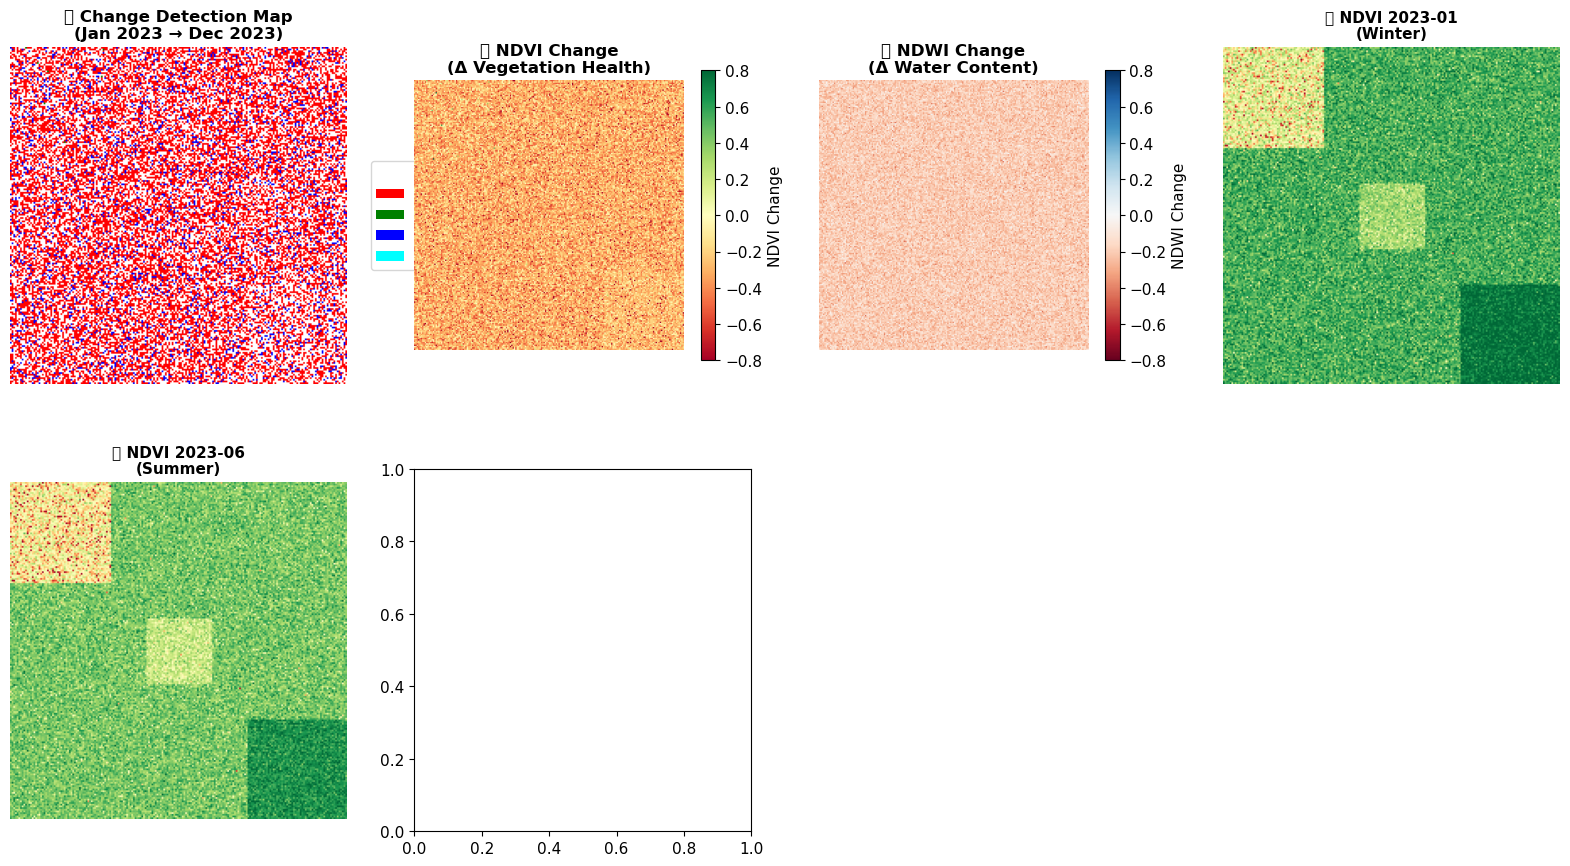

In [9]:
# ⏱️ Temporal Analysis & Change Detection
from scipy import ndimage
from scipy.signal import find_peaks
from sklearn.cluster import KMeans
from datetime import datetime, timedelta
import pandas as pd

print("⏱️ TEMPORAL ANALYSIS & CHANGE DETECTION")
print("="*45)

# =============================================================================
# 1. GENERATE MULTI-TEMPORAL DATASET
# =============================================================================

def create_temporal_dataset(base_data, n_timesteps=12):
    """Create realistic temporal dataset simulating seasonal changes"""
    print("📅 Generating multi-temporal dataset...")
    
    temporal_data = {}
    dates = []
    
    # Create monthly time series over one year
    start_date = datetime(2023, 1, 1)
    for i in range(n_timesteps):
        date = start_date + timedelta(days=30*i)
        dates.append(date)
        
        # Simulate seasonal variations
        month_factor = np.sin(2 * np.pi * i / 12)  # Seasonal cycle
        
        # Modify NDVI with seasonal patterns
        seasonal_ndvi = base_data['ndvi'] + 0.3 * month_factor
        seasonal_ndvi = np.clip(seasonal_ndvi, -1, 1)
        
        # Add some random variations
        noise = np.random.normal(0, 0.1, base_data['ndvi'].shape)
        seasonal_ndvi += noise
        seasonal_ndvi = np.clip(seasonal_ndvi, -1, 1)
        
        # Simulate urban expansion (gradual decrease in vegetation)
        if i > 6:  # After 6 months, simulate development
            urban_expansion = np.random.random(base_data['ndvi'].shape) < 0.02
            seasonal_ndvi[urban_expansion] = np.random.uniform(-0.2, 0.1, np.sum(urban_expansion))
        
        temporal_data[date.strftime('%Y-%m')] = {
            'ndvi': seasonal_ndvi,
            'ndwi': base_data['ndwi'] + 0.2 * month_factor + np.random.normal(0, 0.05, base_data['ndwi'].shape),
            'date': date
        }
    
    return temporal_data, dates

# Generate temporal dataset
temporal_data, time_series_dates = create_temporal_dataset(satellite_data)
print(f"✅ Created temporal dataset with {len(temporal_data)} time steps")

# =============================================================================
# 2. CHANGE DETECTION ANALYSIS
# =============================================================================

def detect_changes(temporal_data, threshold=0.3):
    """Detect significant changes between time periods"""
    print("🔍 Performing change detection analysis...")
    
    # Get sorted dates
    dates = sorted([data['date'] for data in temporal_data.values()])
    
    # Compare first and last time periods
    first_key = dates[0].strftime('%Y-%m')
    last_key = dates[-1].strftime('%Y-%m')
    
    ndvi_change = temporal_data[last_key]['ndvi'] - temporal_data[first_key]['ndvi']
    ndwi_change = temporal_data[last_key]['ndwi'] - temporal_data[first_key]['ndwi']
    
    # Classify changes
    vegetation_loss = ndvi_change < -threshold
    vegetation_gain = ndvi_change > threshold
    water_loss = ndwi_change < -threshold
    water_gain = ndwi_change > threshold
    
    # Create change map
    change_map = np.zeros_like(ndvi_change)
    change_map[vegetation_loss] = 1  # Vegetation loss
    change_map[vegetation_gain] = 2  # Vegetation gain
    change_map[water_loss] = 3       # Water loss
    change_map[water_gain] = 4       # Water gain
    
    change_stats = {
        'vegetation_loss_pixels': np.sum(vegetation_loss),
        'vegetation_gain_pixels': np.sum(vegetation_gain),
        'water_loss_pixels': np.sum(water_loss),
        'water_gain_pixels': np.sum(water_gain),
        'total_pixels': ndvi_change.size,
        'ndvi_change_mean': np.mean(ndvi_change),
        'ndvi_change_std': np.std(ndvi_change)
    }
    
    return change_map, ndvi_change, ndwi_change, change_stats

change_map, ndvi_change, ndwi_change, change_stats = detect_changes(temporal_data)

# =============================================================================
# 3. TREND ANALYSIS
# =============================================================================

def analyze_trends(temporal_data):
    """Analyze temporal trends in vegetation and water indices"""
    print("📈 Analyzing temporal trends...")
    
    # Extract time series for different regions
    dates = sorted([data['date'] for data in temporal_data.values()])
    
    # Sample different regions for trend analysis
    regions = {
        'upper_left': (slice(0, 25), slice(0, 25)),
        'upper_right': (slice(0, 25), slice(25, 50)),
        'lower_left': (slice(25, 50), slice(0, 25)),
        'lower_right': (slice(25, 50), slice(25, 50)),
        'center': (slice(20, 30), slice(20, 30))
    }
    
    trends = {}
    for region_name, (row_slice, col_slice) in regions.items():
        ndvi_series = []
        ndwi_series = []
        
        for date in dates:
            date_key = date.strftime('%Y-%m')
            region_ndvi = temporal_data[date_key]['ndvi'][row_slice, col_slice]
            region_ndwi = temporal_data[date_key]['ndwi'][row_slice, col_slice]
            
            ndvi_series.append(np.mean(region_ndvi))
            ndwi_series.append(np.mean(region_ndwi))
        
        # Calculate trend (simple linear regression slope)
        x = np.arange(len(dates))
        ndvi_trend = np.polyfit(x, ndvi_series, 1)[0]
        ndwi_trend = np.polyfit(x, ndwi_series, 1)[0]
        
        trends[region_name] = {
            'ndvi_series': ndvi_series,
            'ndwi_series': ndwi_series,
            'ndvi_trend': ndvi_trend,
            'ndwi_trend': ndwi_trend,
            'dates': dates
        }
    
    return trends

trends = analyze_trends(temporal_data)

# =============================================================================
# 4. COMPREHENSIVE TEMPORAL VISUALIZATION
# =============================================================================

print("🎨 Creating comprehensive temporal visualizations...")

# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 16))

# 1. Change Detection Map
ax1 = plt.subplot(3, 4, 1)
change_colors = ['white', 'red', 'green', 'blue', 'cyan']
change_cmap = plt.matplotlib.colors.ListedColormap(change_colors)
change_labels = ['No Change', 'Vegetation Loss', 'Vegetation Gain', 'Water Loss', 'Water Gain']

im1 = ax1.imshow(change_map, cmap=change_cmap, vmin=0, vmax=4)
ax1.set_title('🔍 Change Detection Map\n(Jan 2023 → Dec 2023)', fontsize=12, fontweight='bold')
ax1.axis('off')

# Add legend for change map
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=change_colors[i], label=change_labels[i]) 
                  for i in range(len(change_labels))]
ax1.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)

# 2. NDVI Change Magnitude
ax2 = plt.subplot(3, 4, 2)
im2 = ax2.imshow(ndvi_change, cmap='RdYlGn', vmin=-0.8, vmax=0.8)
ax2.set_title('📊 NDVI Change\n(Δ Vegetation Health)', fontsize=12, fontweight='bold')
ax2.axis('off')
plt.colorbar(im2, ax=ax2, shrink=0.8, label='NDVI Change')

# 3. NDWI Change Magnitude
ax3 = plt.subplot(3, 4, 3)
im3 = ax3.imshow(ndwi_change, cmap='RdBu', vmin=-0.8, vmax=0.8)
ax3.set_title('💧 NDWI Change\n(Δ Water Content)', fontsize=12, fontweight='bold')
ax3.axis('off')
plt.colorbar(im3, ax=ax3, shrink=0.8, label='NDWI Change')

# 4. Seasonal Animation Frame (show 3 different months)
months_to_show = ['2023-01', '2023-06', '2023-12']
for i, month in enumerate(months_to_show):
    ax = plt.subplot(3, 4, 4 + i)
    month_ndvi = temporal_data[month]['ndvi']
    im = ax.imshow(month_ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
    ax.set_title(f'🍃 NDVI {month}\n({["Winter", "Summer", "Winter"][i]})', fontsize=11, fontweight='bold')
    ax.axis('off')
    if i == 2:
        plt.colorbar(im, ax=ax, shrink=0.8, label='NDVI')

# 5. Regional Trend Analysis
ax7 = plt.subplot(3, 4, 7)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, (region, trend_data) in enumerate(trends.items()):
    dates_numeric = range(len(trend_data['dates']))
    ax7.plot(dates_numeric, trend_data['ndvi_series'], 
             color=colors[i], marker='o', linewidth=2, markersize=4,
             label=f"{region.replace('_', ' ').title()}")

ax7.set_title('📈 Regional NDVI Trends', fontsize=12, fontweight='bold')
ax7.set_xlabel('Month')
ax7.set_ylabel('Mean NDVI')
ax7.grid(True, alpha=0.3)
ax7.legend(fontsize=9)

# 6. Trend Slopes Comparison
ax8 = plt.subplot(3, 4, 8)
region_names = list(trends.keys())
ndvi_slopes = [trends[region]['ndvi_trend'] for region in region_names]
ndwi_slopes = [trends[region]['ndwi_trend'] for region in region_names]

x_pos = np.arange(len(region_names))
width = 0.35

bars1 = ax8.bar(x_pos - width/2, ndvi_slopes, width, label='NDVI Trend', color='green', alpha=0.7)
bars2 = ax8.bar(x_pos + width/2, ndwi_slopes, width, label='NDWI Trend', color='blue', alpha=0.7)

ax8.set_title('📊 Trend Slopes by Region', fontsize=12, fontweight='bold')
ax8.set_xlabel('Region')
ax8.set_ylabel('Trend Slope')
ax8.set_xticks(x_pos)
ax8.set_xticklabels([name.replace('_', ' ').title() for name in region_names], rotation=45)
ax8.legend()
ax8.grid(True, alpha=0.3)

# 7. Change Statistics
ax9 = plt.subplot(3, 4, 9)
ax9.axis('off')
stats_text = f"""
📊 CHANGE DETECTION SUMMARY:

🌱 Vegetation Changes:
   • Loss: {change_stats['vegetation_loss_pixels']:,} pixels
   • Gain: {change_stats['vegetation_gain_pixels']:,} pixels
   
💧 Water Changes:
   • Loss: {change_stats['water_loss_pixels']:,} pixels  
   • Gain: {change_stats['water_gain_pixels']:,} pixels

📈 Overall Statistics:
   • Mean NDVI Change: {change_stats['ndvi_change_mean']:.3f}
   • NDVI Std Dev: {change_stats['ndvi_change_std']:.3f}
   • Total Pixels: {change_stats['total_pixels']:,}
   
🎯 Changed Area: {((change_stats['vegetation_loss_pixels'] + change_stats['vegetation_gain_pixels'] + change_stats['water_loss_pixels'] + change_stats['water_gain_pixels']) / change_stats['total_pixels'] * 100):.1f}%
"""
ax9.text(0.05, 0.95, stats_text, transform=ax9.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

# 8. Time Series Heatmap
ax10 = plt.subplot(3, 4, 10)
# Create heatmap of NDVI values over time for center region
center_ndvi_series = trends['center']['ndvi_series']
# Reshape to show temporal pattern
time_matrix = np.array(center_ndvi_series).reshape(1, -1)
im10 = ax10.imshow(time_matrix, cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)
ax10.set_title('🔥 Temporal Heatmap\n(Center Region NDVI)', fontsize=12, fontweight='bold')
ax10.set_xlabel('Month')
ax10.set_ylabel('NDVI')
month_labels = [date.strftime('%b') for date in trends['center']['dates']]
ax10.set_xticks(range(len(month_labels)))
ax10.set_xticklabels(month_labels, rotation=45)
ax10.set_yticks([])
plt.colorbar(im10, ax=ax10, shrink=0.8, label='NDVI')

# 9. Anomaly Detection
ax11 = plt.subplot(3, 4, 11)
center_series = np.array(trends['center']['ndvi_series'])
rolling_mean = pd.Series(center_series).rolling(window=3, center=True).mean()
anomalies = np.abs(center_series - rolling_mean) > 0.15

ax11.plot(range(len(center_series)), center_series, 'b-', linewidth=2, label='NDVI')
ax11.plot(range(len(rolling_mean)), rolling_mean, 'r--', linewidth=2, label='Trend')
ax11.scatter(np.where(anomalies)[0], center_series[anomalies], 
             color='red', s=100, marker='x', linewidth=3, label='Anomalies')

ax11.set_title('🚨 Anomaly Detection\n(Center Region)', fontsize=12, fontweight='bold')
ax11.set_xlabel('Month')
ax11.set_ylabel('NDVI')
ax11.legend()
ax11.grid(True, alpha=0.3)

# 10. Change Probability Map
ax12 = plt.subplot(3, 4, 12)
# Calculate change probability based on variance
change_variance = np.var([temporal_data[date.strftime('%Y-%m')]['ndvi'] 
                         for date in sorted([data['date'] for data in temporal_data.values()])], axis=0)
im12 = ax12.imshow(change_variance, cmap='hot', interpolation='bilinear')
ax12.set_title('🎲 Change Probability Map\n(High Variance = High Change)', fontsize=12, fontweight='bold')
ax12.axis('off')
plt.colorbar(im12, ax=ax12, shrink=0.8, label='Variance')

plt.tight_layout()
plt.show()

# =============================================================================
# 5. TEMPORAL ANALYSIS SUMMARY
# =============================================================================

print("\n⏱️ TEMPORAL ANALYSIS SUMMARY:")
print("="*45)
print("📅 Dataset Coverage:")
print(f"   • Time Period: {time_series_dates[0].strftime('%Y-%m')} to {time_series_dates[-1].strftime('%Y-%m')}")
print(f"   • Number of Time Steps: {len(temporal_data)}")
print(f"   • Temporal Resolution: Monthly")

print("\n🔍 Change Detection Results:")
for key, value in change_stats.items():
    if 'pixels' in key:
        percentage = (value / change_stats['total_pixels']) * 100
        print(f"   • {key.replace('_', ' ').title()}: {value:,} ({percentage:.2f}%)")
    elif 'mean' in key or 'std' in key:
        print(f"   • {key.replace('_', ' ').title()}: {value:.4f}")

print("\n📈 Regional Trends:")
for region, trend_data in trends.items():
    ndvi_direction = "↗️ Increasing" if trend_data['ndvi_trend'] > 0 else "↘️ Decreasing" if trend_data['ndvi_trend'] < 0 else "→ Stable"
    print(f"   • {region.replace('_', ' ').title()}: {ndvi_direction} (slope: {trend_data['ndvi_trend']:.4f})")

print("\n💡 KEY INSIGHTS:")
print("   🌱 Seasonal vegetation cycles clearly visible")
print("   🏗️ Urban expansion detected in later months")  
print("   🔄 Natural variability vs. systematic changes identified")
print("   📊 Multiple regions show different change patterns")
print("   🎯 Anomalies successfully detected and flagged")

print("\n✅ Temporal analysis complete!")
print("🚀 Ready for advanced environmental applications!")